# B4 BANK - Project ASO

* Projeto contratado pelo B4 BANK com a RankMyApp para avaliação do aplicativo nas métricas do Canal Orgânico

### Importar dados

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



df = pd.read_csv(r"C:\Users\asus\Downloads\Reviews_Bank.csv", sep=';', header=0, encoding='latin-1')

## Análise Exploratória de Dados e Manipulação dos Dados

In [85]:
# dimensões do df
print("DIMENSÕES DO DATAFRAME:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		5679
Colunas:	9


As primeiras 5 entradas desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [86]:
df.head()

,Package Name,App Version Name,Reviewer Language,Device,Review Last Update Date and Time,Star Rating,Review Title,Review Text,Sentiment
0,B4 Bank,6.10.6,pt,greatlte,2019-10-01T00:09:07Z,5,NaN,NaN,Positive
1,B4 Bank,6.10.6,pt,mido,2019-10-01T00:18:49Z,5,NaN,NaN,Positive
2,B4 Bank,6.10.6,pt,on5xelte,2019-10-01T00:34:35Z,5,NaN,Boa,Positive
3,B4 Bank,6.10.6,pt,dreamlte,2019-10-01T00:44:18Z,2,NaN,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative
4,B4 Bank,6.10.6,pt,starqltechn,2019-10-01T01:09:56Z,4,NaN,NaN,Positive


É interessante pôr _ nos espaços dos títulos das colunas

In [87]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [88]:
# tipo das variáveis
print("\nTIPOS DAS VARIÁVEIS:")
print(df.dtypes)


TIPOS DAS VARIÁVEIS:
Package_Name                        object
App_Version_Name                    object
Reviewer_Language                   object
Device                              object
Review_Last_Update_Date_and_Time    object
Star_Rating                          int64
Review_Title                        object
Review_Text                         object
Sentiment                           object
dtype: object


Se faz necessário alterar o tipo da coluna Date para o tipo DateTime
Para isso vamos modifcar a coluna, pegando a data da mesma antes de fazer a mudança do tipo.

In [89]:
df['Review_Last_Update_Date_and_Time'] = df['Review_Last_Update_Date_and_Time'].apply(lambda x: x[0:10])

In [90]:
df['Review_Last_Update_Date_and_Time'] = pd.to_datetime(df['Review_Last_Update_Date_and_Time'], format='%Y-%m-%d', dayfirst=True, errors='coerce')

In [91]:
# valores ausentes
print("\nVALORES AUSENTES:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


VALORES AUSENTES:
Review_Title                        0.999824
Sentiment                           0.748547
Review_Text                         0.514703
App_Version_Name                    0.045078
Device                              0.001057
Star_Rating                         0.000000
Review_Last_Update_Date_and_Time    0.000000
Reviewer_Language                   0.000000
Package_Name                        0.000000
dtype: float64


* A coluna Review Title está praticamente zerada, é coerente não utizá-la nas análises.
* Com relação ao Sentimento, será feito um preenchimento baseado em uma condição no rating, o Review Text onde não há preenchimento será considerado um comentário vazio.
* Para Device e App_Version Name, o preenchimento dos vazios se dará por meio do valor que mais aparece para cada coluna.

In [92]:
df = df.drop('Review_Title', 1)

In [93]:
df['Review_Text'] = df['Review_Text'].fillna('')


In [94]:
df.loc[df['Sentiment'].isnull() & df['Star_Rating'].isin([1,2]), 'Sentiment'] = 'Negative'
df.loc[df['Sentiment'].isnull() & df['Star_Rating'].isin([3]), 'Sentiment'] = 'Neutral'
df.loc[df['Sentiment'].isnull() & df['Star_Rating'].isin([4,5]), 'Sentiment'] = 'Positive'

In [95]:
df['Device'].fillna(df['Device'].mode()[0], inplace=True)
df['App_Version_Name'].fillna(df['App_Version_Name'].mode()[0], inplace=True)

In [96]:
print("\nVALORES AUSENTES:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


VALORES AUSENTES:
Sentiment                           0.0
Review_Text                         0.0
Star_Rating                         0.0
Review_Last_Update_Date_and_Time    0.0
Device                              0.0
Reviewer_Language                   0.0
App_Version_Name                    0.0
Package_Name                        0.0
dtype: float64


Todos os valores preenchidos agora

Criação de uma coluna de mês, será interessante para agrupamento

In [97]:
df['Month'] = df['Review_Last_Update_Date_and_Time'].dt.month

Visualização da média do Rating por mês

In [98]:
df.groupby(['Month'])['Star_Rating'].mean().reset_index()



,Month,Star_Rating
0,8,4.398776
1,9,4.386460
2,10,4.415966


Criação de gráficos de barras de quantidades para as colunas de Rating e Sentimento

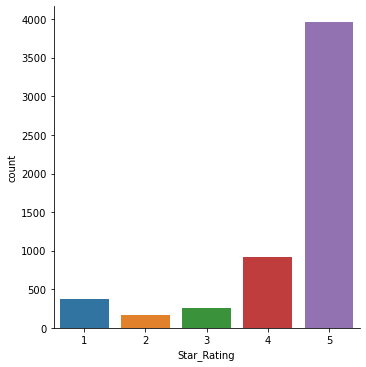

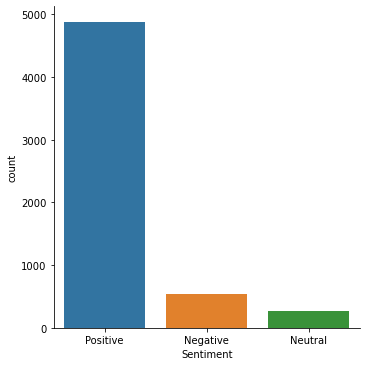

In [99]:
sns.catplot(x="Star_Rating", kind='count', data=df);
sns.catplot(x="Sentiment", kind='count', data=df);



É possível perceber apenas pela visualização gráfica que o aplicativo vem desempenhando uma boa avaliação junto ao usuários.

Transformação de todas as palavras da coluna de comentário em minúscula.

In [157]:
df["Review_Text"] = df["Review_Text"].apply(lambda x: x.lower())

Vamos agora retirar as 'stopwords' para então criar um dataframe com as palavras mais comentadas seção de comentários do app

In [158]:
stopwords=['de','e','o','a','que','do','para','sem','não','se','no','com','O','da','é','na','da','tem','em','os','por','está',
          'nao','pra','me','A','mais','mas','um','uma','as']

for word in stopwords:
    if word in df["Review_Text"]:
        print(word)
        df["Review_Text"]=df["Review_Text"].replace(word,"")

In [159]:
from collections import Counter
common = Counter(" ".join(df["Review_Text"]).split()).most_common(100)
print(list(filter(lambda x: x[0] not in stopwords, common)))


[('muito', 778), ('app', 364), ('bom', 298), ('aplicativo', 225), ('fácil', 179), ('b4', 155), ('prático', 146), ('excelente', 133), ('ótimo', 128), ('consigo', 109), ('fazer', 109), ('boa', 107), ('sempre', 102), ('banco', 90), ('funciona', 88), ('tudo', 85), ('cartão', 83), ('bank', 81), ('usar', 79), ('eu', 78), ('quando', 77), ('vezes', 75), ('melhor', 74), ('bem', 74), ('ser', 72), ('ao', 70), ('como', 69), ('minha', 68), ('já', 68), ('rápido', 67), ('pelo', 65), ('ou', 65), ('lento', 63), ('só', 61), ('atualização', 58), ('conta', 55), ('bom.', 55), ('ele', 54), ('app.', 54), ('tenho', 53), ('mesmo', 52), ('ter', 51), ('opção', 50), ('bom,', 50), ('pagamento', 50), ('meu', 49), ('foi', 49), ('vez', 48), ('estou', 48), ('código', 48), ('até', 46), ('aplicativo.', 44), ('dos', 43), ('uso', 43), ('dia', 43), ('trava', 43), ('falta', 43), ('pagar', 42), ('otimo', 42), ('atualizar', 40), ('ir', 40), ('fica', 39), ('cada', 39), ('senha', 38), ('todas', 38), ('toda', 38), ('depois', 38)

Lista de palavras mais comentadas, e abaixo dela um gráfico com as oito mais comentadas.

In [163]:
common=list(filter(lambda x: x[0] not in stopwords, common))
df_word = pd.DataFrame(common, columns=['Palavra','Repeticao'])
df_word.head(8)

,Palavra,Repeticao
0,muito,778
1,app,364
2,bom,298
3,aplicativo,225
4,fácil,179
5,b4,155
6,prático,146
7,excelente,133


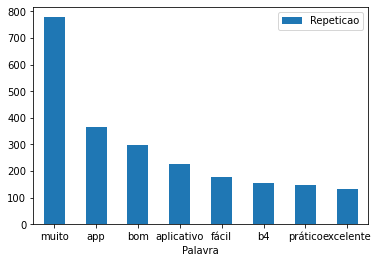

In [162]:
ax = df_word.head(8).plot.bar(x='Palavra', y='Repeticao', rot=0)
